# Assignment 1

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
enc_data = {
    'is_smoker': [1 if i=='yes' else 0 for i in df['smoker']],
    'is_male': [1 if i=='male' else 0 for i in df['sex']],
    'southwest': [1 if i=='southwest' else 0 for i in df['region']],
    'southeast': [1 if i=='southeast' else 0 for i in df['region']],
    'northwest': [1 if i=='northwest' else 0 for i in df['region']],
    'northeast': [1 if i=='northeast' else 0 for i in df['region']],
}
enc_df = df.join(pd.DataFrame(data=enc_data))
enc_df = enc_df.drop(columns = ['sex', 'smoker', 'region'])

In [5]:
enc_df.head()

,age,bmi,children,charges,is_smoker,is_male,southwest,southeast,northwest,northeast
0,19,27.900,0,16884.92400,1,0,1,0,0,0
1,18,33.770,1,1725.55230,0,1,0,1,0,0
2,28,33.000,3,4449.46200,0,1,0,1,0,0
3,33,22.705,0,21984.47061,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,0,1,0


In [6]:
enc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   int64  
 3   charges    1338 non-null   float64
 4   is_smoker  1338 non-null   int64  
 5   is_male    1338 non-null   int64  
 6   southwest  1338 non-null   int64  
 7   southeast  1338 non-null   int64  
 8   northwest  1338 non-null   int64  
 9   northeast  1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'charges'}>,
        <AxesSubplot:title={'center':'is_smoker'}>,
        <AxesSubplot:title={'center':'is_male'}>],
       [<AxesSubplot:title={'center':'southwest'}>,
        <AxesSubplot:title={'center':'southeast'}>,
        <AxesSubplot:title={'center':'northwest'}>],
       [<AxesSubplot:title={'center':'northeast'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

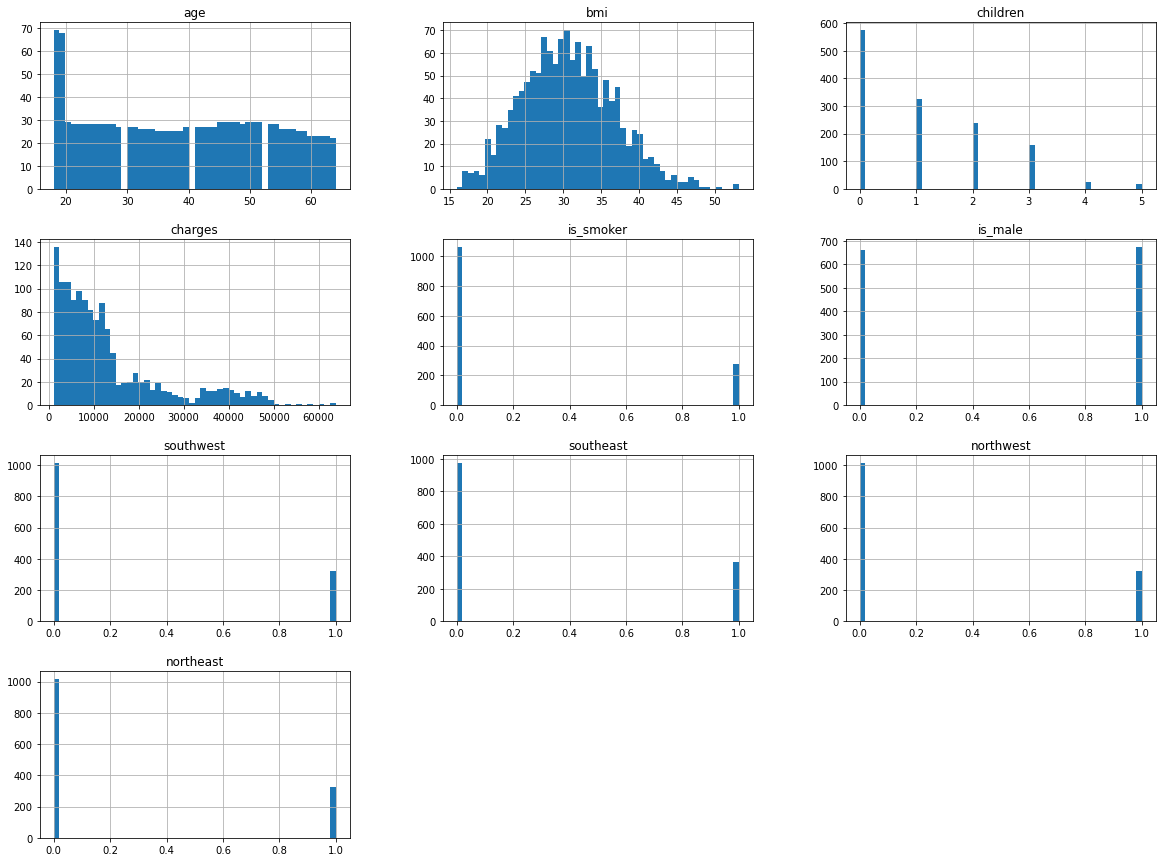

In [7]:
enc_df.hist(bins=50, figsize=(20, 15))

In [8]:
enc_df.corr()['charges']

age          0.299008
bmi          0.198341
children     0.067998
charges      1.000000
is_smoker    0.787251
is_male      0.057292
southwest   -0.043210
southeast    0.073982
northwest   -0.039905
northeast    0.006349
Name: charges, dtype: float64

[Text(0.5, 0, 'bmi'), Text(0, 0.5, 'charge')]

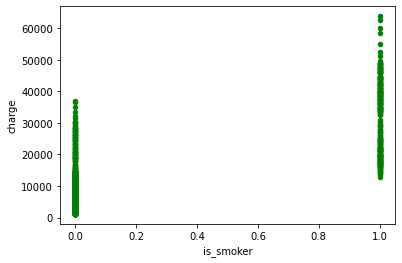

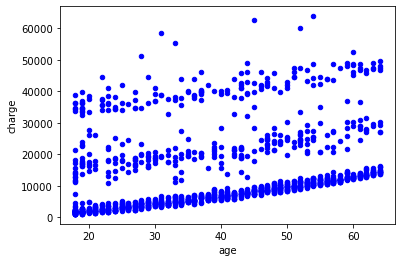

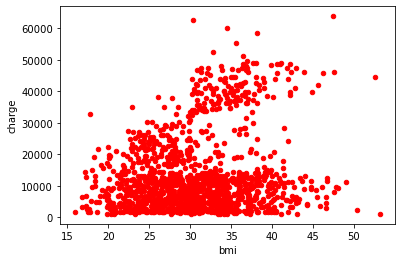

In [9]:
ax_smk = enc_df.plot.scatter(x='is_smoker', y='charges', c='green')
ax_smk.set(xlabel='is_smoker', ylabel='charge')

ax_age = enc_df.plot.scatter(x='age', y='charges', c='blue')
ax_age.set(xlabel='age', ylabel='charge')

ax_bmi = enc_df.plot.scatter(x='bmi', y='charges', c='red')
ax_bmi.set(xlabel='bmi', ylabel='charge')

array([[<AxesSubplot:xlabel='charges', ylabel='charges'>,
        <AxesSubplot:xlabel='is_smoker', ylabel='charges'>,
        <AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='is_male', ylabel='charges'>,
        <AxesSubplot:xlabel='children', ylabel='charges'>],
       [<AxesSubplot:xlabel='charges', ylabel='is_smoker'>,
        <AxesSubplot:xlabel='is_smoker', ylabel='is_smoker'>,
        <AxesSubplot:xlabel='age', ylabel='is_smoker'>,
        <AxesSubplot:xlabel='bmi', ylabel='is_smoker'>,
        <AxesSubplot:xlabel='is_male', ylabel='is_smoker'>,
        <AxesSubplot:xlabel='children', ylabel='is_smoker'>],
       [<AxesSubplot:xlabel='charges', ylabel='age'>,
        <AxesSubplot:xlabel='is_smoker', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='is_male', ylabel='age'>,
        <AxesSubplot:xlabel='childre

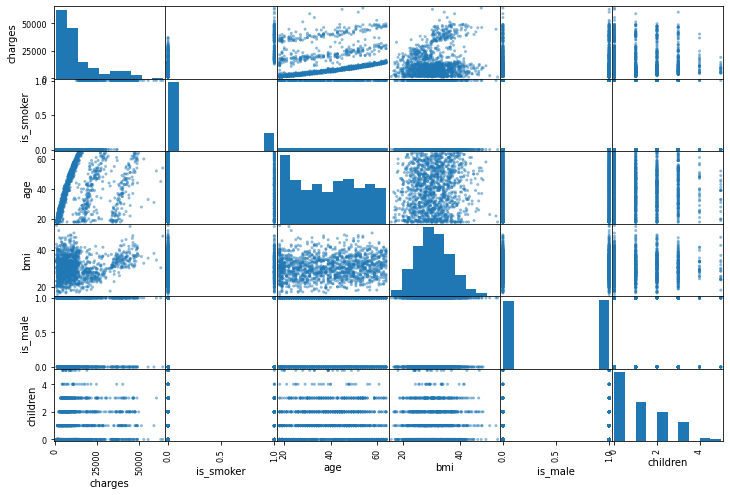

In [10]:
from pandas.plotting import scatter_matrix
attributes = ['charges', 'is_smoker', 'age', 'bmi', 'is_male', 'children']
scatter_matrix(enc_df[attributes], figsize=(12, 8))

In [5]:
features_to_scale = ['age', 'bmi', 'children', 'charges']
data = {}
min_max_dict = {}
for feature in features_to_scale:
    min_value = min(enc_df[feature])
    max_value = max(enc_df[feature])
    min_max_dict[feature] = {}
    min_max_dict[feature]['min'] = min_value
    min_max_dict[feature]['max'] = max_value
    data[feature] = [(v-min_value)/(max_value-min_value) for v in enc_df[feature]]

scaled_df = enc_df.drop(columns=features_to_scale)
scaled_df = scaled_df.join(pd.DataFrame(data=data))

In [6]:
scaled_df.head()

,is_smoker,is_male,southwest,southeast,northwest,northeast,age,bmi,children,charges
0,1,0,1,0,0,0,0.021739,0.321227,0.0,0.251611
1,0,1,0,1,0,0,0.000000,0.479150,0.2,0.009636
2,0,1,0,1,0,0,0.217391,0.458434,0.6,0.053115
3,0,1,0,0,1,0,0.326087,0.181464,0.0,0.333010
4,0,1,0,0,1,0,0.304348,0.347592,0.0,0.043816


In [7]:
min_max_dict

{'age': {'min': 18, 'max': 64},
 'bmi': {'min': 15.96, 'max': 53.13},
 'children': {'min': 0, 'max': 5},
 'charges': {'min': 1121.8739, 'max': 63770.42801}}

In [8]:
X = scaled_df.drop(columns=['charges']).to_numpy()
print(f"X.shape {X.shape}")
X1 = np.c_[np.ones((X.shape[0], 1)), X]
print(f"X.shape {X1.shape}")
Y = scaled_df['charges'].to_numpy()
print(f"Y.shape {Y.shape}")
Y = np.reshape(Y, [Y.shape[0], 1])
print(f"Y.shape {Y.shape}")

X.shape (1338, 9)
X.shape (1338, 10)
Y.shape (1338,)
Y.shape (1338, 1)


In [9]:
import matplotlib.pyplot as plt


class BatchGradientDescent:
    converge_condition = 0.00000001

    def __init__(self, x, y, learning_rate, number_of_iteration=None, init_theta=None):
        """
        :param x: columns of independent variable
        :param y: one column of dependent variable
        :param learning_rate: the scalar multiplied with the gradient every step
        :param number_of_iteration: if not specified the break condition is convergence
        :param init_theta: initial arguments, default value is a column of zeros
        """
        self.x = x
        self.y = y
        self.lr = learning_rate
        self.ni = number_of_iteration
        self.theta = init_theta if init_theta else np.array([0] * x.shape[1]).reshape([x.shape[1], 1])
        self.history = [
            (
                self.theta.flatten(),
                self.gradient().flatten(),
                self.cost()
            )
        ]
        self.epoch = 0

    def forecast(self):
        return np.dot(self.x, self.theta)

    def cost(self):
        return np.mean((self.forecast() - self.y) ** 2)

    def test(self, x, y):
        return np.mean((np.dot(x, self.theta) - y) ** 2)

    def gradient(self):
        error = self.forecast() - self.y
        tile_error = np.tile(error, self.theta.shape[0])
        return np.mean(2 * tile_error * self.x, axis=0)

    def train(self):
        while True:
            # Compute gradient
            grad = self.gradient()
            grad = grad.reshape(-1, 1)
            # Update parameters
            self.theta = self.theta - self.lr * grad.reshape(-1, 1)
            # Calculate the loss
            loss = self.cost()
            # Decide break
            if self.ni:
                if self.epoch == self.ni:
                    break
            else:
                if self.history[-1][-1]-loss <= self.converge_condition:
                    break
            self.epoch += 1
            # Store the parameter, the gradient, the loss
            self.history.append((self.theta.flatten(), self.gradient().flatten(), loss))
        return self.history

    def plot_loss_history(self):
        plt.plot(
            [i for i in range(self.epoch + 1)],
            [line[2] for line in self.history]
        )
        plt.xlabel("number of iteration")
        plt.ylabel("loss")
        plt.show()

    @property
    def loss_history(self):
        return [line[2] for line in self.history]

    @property
    def loss_final(self):
        return self.history[-1][2]

    @property
    def theta_final(self):
        return self.theta

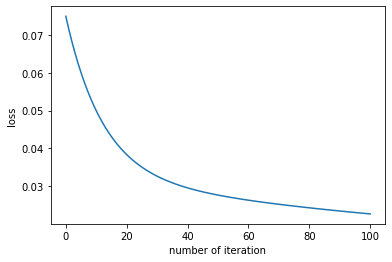

In [10]:
M1 = BatchGradientDescent(
    X1,
    Y,
    learning_rate=0.01,
    number_of_iteration=100
)
M1.train()
M1.plot_loss_history()

In [11]:
M1.loss_final

0.022649992201952972

In [12]:
M1.theta_final

array([[0.08310955],
       [0.11797571],
       [0.03477166],
       [0.01536163],
       [0.02950179],
       [0.01646392],
       [0.02178221],
       [0.06552802],
       [0.04275242],
       [0.02209545]])

In [13]:
from sklearn.preprocessing import PolynomialFeatures
def high_degree_performances(x, y, top_degree, lr, ni=None):
    models = []
    for d in range(1, top_degree+1):
        polynomial_feature = PolynomialFeatures(degree=d, include_bias=False).fit_transform(x)
        model = BatchGradientDescent(polynomial_feature, y, lr, ni)
        model.train()
        models.append(model)
        print(high_degree_performances, f"degree={d} finished, {top_degree} in total")

    if ni:
        for d in range(1, top_degree+1):
            plt.plot(
                [i for i in range(ni + 1)],
                models[d-1].loss_history,
                label=f"degree={d}"
            )
        plt.legend()
        plt.xlabel("number of iteration")
        plt.ylabel("loss")
        plt.title(f"Loss Versus Number of Iteration, lr={lr}")
        plt.show()
    else:
        plt.plot(
            [i for i in range(1, top_degree + 1)],
            [m.loss_final for m in models],
        )
        plt.xlabel("degree of polynomial")
        plt.ylabel("convergence loss")
        plt.title(f"Performance Versus Degree of Polynomial")
        plt.show()
    return models

<function high_degree_performances at 0x7fda806f2d30> degree=1 finished, 5 in total
<function high_degree_performances at 0x7fda806f2d30> degree=2 finished, 5 in total
<function high_degree_performances at 0x7fda806f2d30> degree=3 finished, 5 in total
<function high_degree_performances at 0x7fda806f2d30> degree=4 finished, 5 in total
<function high_degree_performances at 0x7fda806f2d30> degree=5 finished, 5 in total


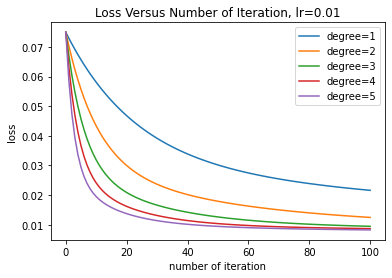

In [15]:
# train model by specifying the total number of iteration
high_degree_performances(X, Y, 5, 0.01, 100)

<function high_degree_performances at 0x7fda806f2d30> degree=1 finished, 4 in total
<function high_degree_performances at 0x7fda806f2d30> degree=2 finished, 4 in total
<function high_degree_performances at 0x7fda806f2d30> degree=3 finished, 4 in total
<function high_degree_performances at 0x7fda806f2d30> degree=4 finished, 4 in total


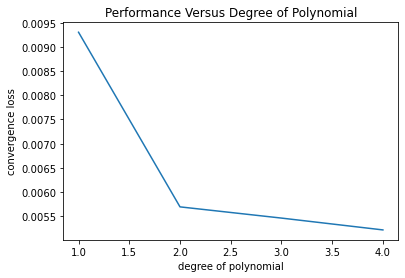

In [16]:
# train model by auto-decided convergence based on threshold value
# takes about 2 minutes to run
high_degree_performances(X, Y, 4, 0.1)

In [18]:
def k_fold(x, y, d, lr, k=10):
    """
    :param x: original dataset independent variables
    :param y: original dataset dependent variable
    :param d: degree of the model
    :param lr: learning rate
    :param k: number of slice
    :return:
    """
    length_of_test = int(x.shape[0]/k)
    x = PolynomialFeatures(degree=d, include_bias=False).fit_transform(x)
    x_slices = [x[i*length_of_test: (i+1)*length_of_test-1, :] for i in range(k)]
    y_slices = [y[i*length_of_test: (i+1)*length_of_test-1, :] for i in range(k)]
    performance_train = []
    performance_test = []
    for i in range(k):
        x_test = x_slices[i]
        y_test = y_slices[i]
        # vertical concatenate
        x_train = np.concatenate([x_slices[j] for j in range(k) if j != i], axis=0)
        y_train = np.concatenate([y_slices[j] for j in range(k) if j != i], axis=0)

        model = BatchGradientDescent(x_train, y_train, lr)
        model.train()

        performance_train.append(model.loss_final)
        performance_test.append(model.test(x_test, y_test))

        print(k_fold, f"fold {i} finished, {k} in total")
    return np.mean(performance_train), np.mean(performance_test)


def high_degree_validations(x, y, top_degree, lr, k):
    train_performances = []
    test_performances = []
    for d in range(1, top_degree+1):
        train_p, test_p = k_fold(x, y, d, lr, k)
        train_performances.append(train_p)
        test_performances.append(test_p)
        print(high_degree_validations, f"degree={d} finished, {top_degree} in total")

    axis = [i for i in range(1, top_degree + 1)]
    plt.plot(
        axis,
        train_performances,
        label="performance on train set"
    )
    plt.plot(
        axis,
        test_performances,
        label="performance on test set"
    )
    plt.legend()
    plt.xlabel("degree of polynomial")
    plt.ylabel("performance")
    plt.title(f"{k}-Fold Cross Validation")
    plt.show()
    return train_performances, test_performances

<function k_fold at 0x7fda6bf150d0> fold 0 finished, 2 in total
<function k_fold at 0x7fda6bf150d0> fold 1 finished, 2 in total
<function high_degree_validations at 0x7fda6bf15160> degree=1 finished, 4 in total
<function k_fold at 0x7fda6bf150d0> fold 0 finished, 2 in total
<function k_fold at 0x7fda6bf150d0> fold 1 finished, 2 in total
<function high_degree_validations at 0x7fda6bf15160> degree=2 finished, 4 in total
<function k_fold at 0x7fda6bf150d0> fold 0 finished, 2 in total
<function k_fold at 0x7fda6bf150d0> fold 1 finished, 2 in total
<function high_degree_validations at 0x7fda6bf15160> degree=3 finished, 4 in total
<function k_fold at 0x7fda6bf150d0> fold 0 finished, 2 in total
<function k_fold at 0x7fda6bf150d0> fold 1 finished, 2 in total
<function high_degree_validations at 0x7fda6bf15160> degree=4 finished, 4 in total


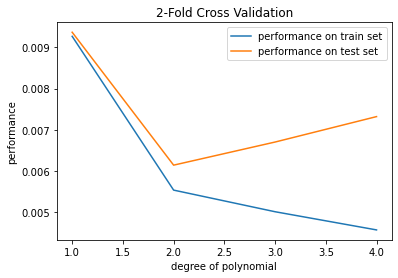

([0.009268838607262022,
  0.005537842597326814,
  0.00501321502800274,
  0.004572061824403702],
 [0.009367723849858168,
  0.006143365521639826,
  0.006704040929732974,
  0.0073210652913051726])

In [19]:
# takes about 10 minutes to run
high_degree_validations(X, Y, 4, 0.1, 2)